
Deep Learning
========

### Project I

> Antonopoulos Ilias p3352004 </br>
> Ndoja Silva p3352017 </br>
> Postgraduate Students, MSc Data Science AUEB </br>

### Project Description - Fashion item recognition

The aim of the current project is given an image of a fashion item to build a deep learning model that recognizes the fashion item. </br>
There have been used TODO different architectures
- Logistic Regression
- MLPs 
- CNNs

### Dataset

For the implementation of this project the Fashion-MNIST dataset has been used to train and evaluate the models, which can be found at https://github.com/zalandoresearch/fashion-mnist. The dataset is also available from Tensorflow and Keras.

In [1]:
import gc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

%matplotlib inline

from tensorflow.keras import backend as K # Importing Keras backend (by default it is Tensorflow)
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Conv2D, Dense, Dropout, Flatten, MaxPool2D # Layers to be used for building our model
from tensorflow.keras.models import Model # The class used to create a model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed

print(tf.__version__)

2.8.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Train dataset exploration

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Test dataset exploration

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

### Preprocess 

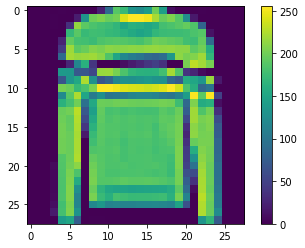

In [9]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

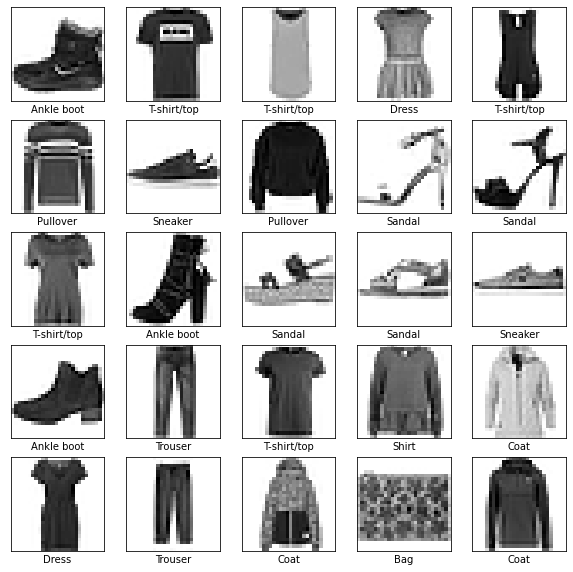

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
batch_size = 128
classes = 10
epochs = 100

In [12]:
tr_images = train_images.copy()
ts_images = test_images.copy()

In [13]:
train_images = train_images.reshape(60000,784)
train_images = train_images / 255.0
train_images = train_images.astype('float32')
train_labels = to_categorical(train_labels,classes)

test_images = test_images.reshape(10000,784)
test_images = test_images / 255.0
test_images = test_images.astype('float32')
test_labels = to_categorical(test_labels,classes)

### Build the model

In [14]:
def train_model(
        train_data,
        train_labels,
        optimizer,
        epochs=100,
        batch_size=128,
        hidden_layers=0,
        hidden_activation='relu',
        output_activation='softmax',
        verbose=0):
    
    np.random.seed(1402) # Define the seed for numpy to have reproducible experiments.
    set_seed(1981) # Define the seed for Tensorflow to have reproducible experiments.
    
    # Define the input layer.
    input_ = Input(
        shape=(784,),
        name='Input'
    )

    x = input_
    # Define the remaining hidden layers.
    for i in range(hidden_layers):
        x = Dense(
            units=256,
            kernel_initializer='glorot_uniform',
            activation=hidden_activation,
            name='Hidden-{0:d}'.format(i + 1)
        )(x)
        
    # Define the output layer.
    output = Dense(
        units=classes,
        kernel_initializer='glorot_uniform',
        activation=output_activation,
        name='Output'
    )(x)

    # Define the model and train it.
    model = Model(inputs=input_, outputs=output)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    hs = model.fit(
        x=train_images,
        y=train_labels,
        validation_split=0.1, # use 10% of the training data as validation data
        epochs=epochs,
        verbose=verbose,
        batch_size=batch_size
    )
    print('Finished training.')
    print('------------------')
    model.summary() # Print a description of the model.
    return model, hs


In [15]:
def clean_up(model):
    K.clear_session()
    del model
    gc.collect()

In [16]:
def plot_history(hs, epochs, metric):
    print()
    #plt.style.use('dark_background')
    plt.rcParams['figure.figsize'] = [15, 8]
    plt.rcParams['font.size'] = 16
    plt.clf()
    for label in hs:
        plt.plot(hs[label].history[metric], label='{0:s} train {1:s}'.format(label, metric), linewidth=2)
        plt.plot(hs[label].history['val_{0:s}'.format(metric)], label='{0:s} validation {1:s}'.format(label, metric), linewidth=2)
    x_ticks = np.arange(0, epochs + 1, epochs / 10)
    x_ticks [0] += 1
    plt.xticks(x_ticks)
    plt.ylim((0, 1))
    plt.xlabel('Epochs')
    plt.ylabel('Loss' if metric=='loss' else 'Accuracy')
    plt.legend()
    plt.show()

In [17]:
# Using SGD
optimizer = SGD(lr=0.01)

# Logistic Regression
lr_model_sgd, lr_hs_sgd = train_model(
    train_data=train_images,
    train_labels=train_labels,
    optimizer=optimizer,
    epochs=epochs,
    batch_size=batch_size,
    hidden_layers=0,
    hidden_activation='relu',
    output_activation='softmax'
)

# Evaluate on test data and show all the results.
lr_eval_sgd = lr_model_sgd.evaluate(test_images, test_labels, verbose=1)
clean_up(model=lr_model_sgd)

C:\Users\Silva\AppData\Local\pypoetry\Cache\virtualenvs\fashion-mnist-classification-bCpU8agG-py3.10\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Finished training.
------------------
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 784)]             0         
                                                                 
 Output (Dense)              (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step - loss: 0.4584 - accuracy: 0.8397


Train Accuracy     : 0.85804
Validation Accuracy: 0.85467
Test Accuracy      : 0.83970



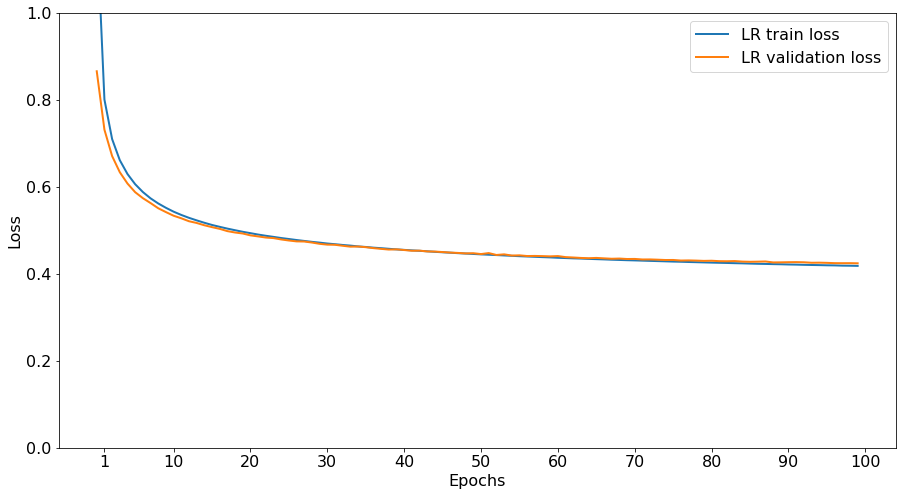

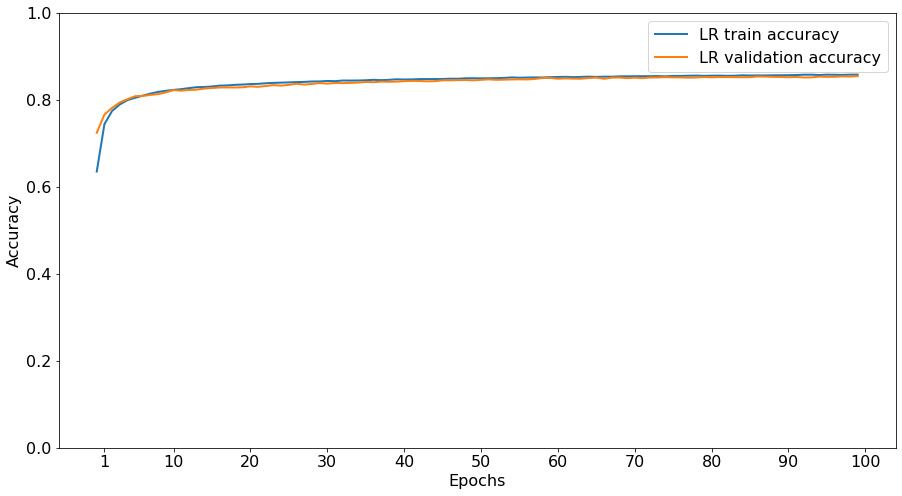

In [18]:
print("Train Accuracy     : {0:.5f}".format(lr_hs_sgd.history['accuracy'][-1]))
print("Validation Accuracy: {0:.5f}".format(lr_hs_sgd.history['val_accuracy'][-1]))
print("Test Accuracy      : {0:.5f}".format(lr_eval_sgd[1]))

# Plot train and validation error per epoch.
plot_history(hs={'LR': lr_hs_sgd}, epochs=epochs, metric='loss')
plot_history(hs={'LR': lr_hs_sgd}, epochs=epochs, metric='accuracy')

In [19]:
# Using Adam
optimizer = Adam()

# MLP
mlp_model_adam, mlp_hs_adam = train_model(
    train_data=train_images,
    train_labels=train_labels,
    optimizer=optimizer,
    epochs=epochs,
    batch_size=batch_size,
    hidden_layers=1,
    hidden_activation='relu',
    output_activation='softmax'
)

# Evaluate on test data and show all the results.
mlp_eval_adam = mlp_model_adam.evaluate(test_images, test_labels, verbose=1)
clean_up(model=mlp_model_adam)

Finished training.
------------------
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 784)]             0         
                                                                 
 Hidden-1 (Dense)            (None, 256)               200960    
                                                                 
 Output (Dense)              (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 3ms/step - loss: 0.7320 - accuracy: 0.8876


Train Accuracy     : 0.98831
Validation Accuracy: 0.89100
Test Accuracy      : 0.88760



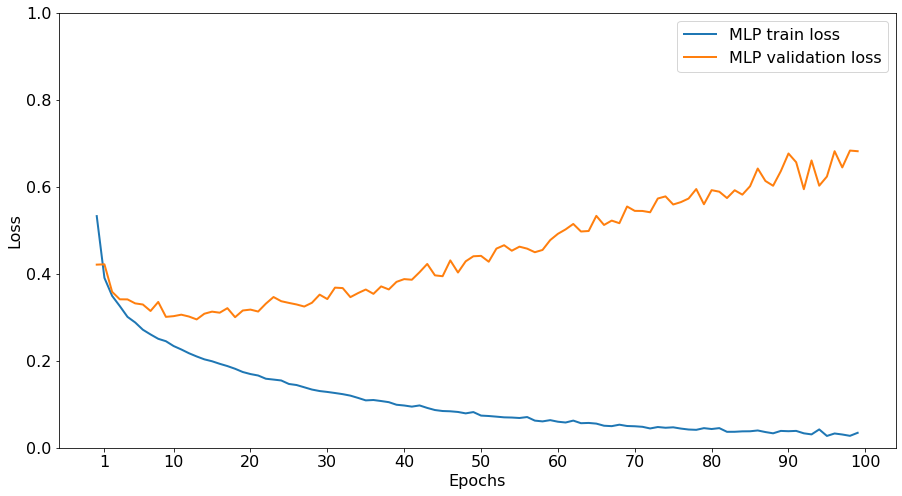

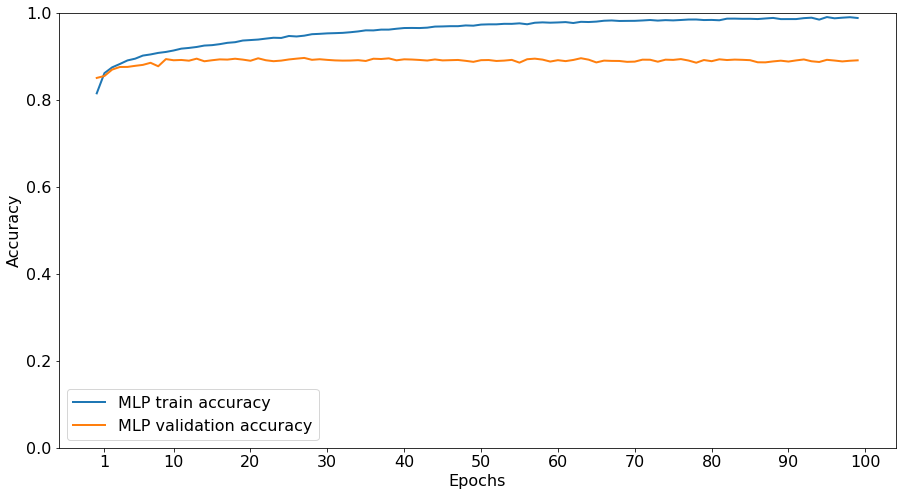

In [20]:
print("Train Accuracy     : {0:.5f}".format(mlp_hs_adam.history['accuracy'][-1]))
print("Validation Accuracy: {0:.5f}".format(mlp_hs_adam.history['val_accuracy'][-1]))
print("Test Accuracy      : {0:.5f}".format(mlp_eval_adam[1]))

# Plot train and validation error per epoch.
plot_history(hs={'MLP': mlp_hs_adam}, epochs=epochs, metric='loss')
plot_history(hs={'MLP': mlp_hs_adam}, epochs=epochs, metric='accuracy')

In [21]:
probability_model = tf.keras.Sequential([mlp_model_adam, 
                                         tf.keras.layers.Softmax()])

In [22]:
predictions = probability_model.predict(test_images)

In [23]:
predictions[0]

array([0.08533675, 0.08533675, 0.08533675, 0.08533675, 0.08533675,
       0.08533675, 0.08533675, 0.08533683, 0.08533675, 0.2319691 ],
      dtype=float32)

In [24]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [25]:
train_images = train_images.reshape(60000, 28, 28)
test_images = test_images.reshape(10000, 28, 28)